In [1]:
! gdown --id 15rT9a51loB3KK2BKgtmPxVtmAubZnVbQ

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=15rT9a51loB3KK2BKgtmPxVtmAubZnVbQ
To: /content/dataset_2class.zip
100% 111M/111M [00:02<00:00, 38.0MB/s]


In [2]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

EXTRACT ZIP

In [ ]:
#extract zip

In [3]:
import zipfile

local_zip = '/content/dataset_2class.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()

zip_ref.close()

In [4]:
import os

base_dir = '/content/dataset_2class'

print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/valid'))

Contents of base directory:
['train', 'test', 'valid']

Contents of train directory:
['nuklear', 'healthy']

Contents of validation directory:
['nuklear', 'healthy']


In [5]:
import os

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')

# Directory with training pictures
train_nuklear_dir = os.path.join(train_dir, 'nuklear')
train_healty_dir = os.path.join(train_dir, 'healthy')

# Directory with validation pictures
validation_nuklear_dir = os.path.join(validation_dir, 'nuklear')
validation_healty_dir = os.path.join(validation_dir, 'healthy')

# Directory with testing pictures
test_nuklear_dir = os.path.join(test_dir, 'nuklear')
test_healty_dir = os.path.join(test_dir, 'healthy')

In [6]:
#lihat isi
train_nuklear_fnames = os.listdir( train_nuklear_dir )
train_healty_fnames = os.listdir(train_healty_dir)



print(train_nuklear_fnames[:10])
print(train_healty_fnames[:10])

['D2_10bbdb0a-60a5-11ec-8402-0a7404972c70_jpg.rf.9b51edeb40c25ab585323f5ec4dd3238.jpg', 'D14_10c36b31-60a5-11ec-8402-0a7404972c70_jpg.rf.7653fdb7e29438d388f41a9bf3489b0e.jpg', 'D0_0ded54b8-60a5-11ec-8402-0a7404972c70_jpg.rf.5f4a47908cf78f5070f3f4c44d72f7e0.jpg', 'D1_10d33b72-60a5-11ec-8402-0a7404972c70_jpg.rf.e64f6272618dc5327cb0b8b5bc4c0e4d.jpg', 'D1_2e17ab06-60a5-11ec-8402-0a7404972c70_jpg.rf.bf86f18d1dd3bd552a3a89514dcf447e.jpg', 'D1_0daa8156-60a5-11ec-8402-0a7404972c70_jpg.rf.982656120d7944067100b6fc57442c38.jpg', 'D0_1857ee37-60a5-11ec-8402-0a7404972c70_jpg.rf.81daa53d8faee56a796da0fbb43bf3d4.jpg', 'D1_10542d1b-60a5-11ec-8402-0a7404972c70_jpg.rf.d95aa1920b0ced433629056903ae7f8d.jpg', 'D0_0df430e1-60a5-11ec-8402-0a7404972c70_jpg.rf.fb7ba8806d271a10b2343d7ae4b04198.jpg', 'D1_1276a4b8-60a5-11ec-8402-0a7404972c70_jpg.rf.9b3664434d6fa8c19bc0fab0688daec5.jpg']
['D19_28fabfdf-60a5-11ec-8402-0a7404972c70_jpg.rf.467f9aee7fa878105e24eadd0da7f00a.jpg', 'D2_0c46b044-60a5-11ec-8402-0a7404972c7

In [7]:
#lihat jumlah data masing-masing file

print('total training nuklear images :', len(os.listdir(      train_nuklear_dir ) ))
print('total training Healty eye images :', len(os.listdir(      train_healty_dir ) ))

print('total validation nuklear images :', len(os.listdir(      validation_nuklear_dir ) ))
print('total validation Healty eye images :', len(os.listdir(      validation_healty_dir ) ))

print('total test nuklear images :', len(os.listdir(      test_nuklear_dir ) ))
print('total test Healty eye images :', len(os.listdir(      test_healty_dir ) ))



total training nuklear images : 1344
total training Healty eye images : 1344
total validation nuklear images : 168
total validation Healty eye images : 168
total test nuklear images : 168
total test Healty eye images : 168


In [8]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

Untuk lihat gambar nuklear sklerosis dan ringworm

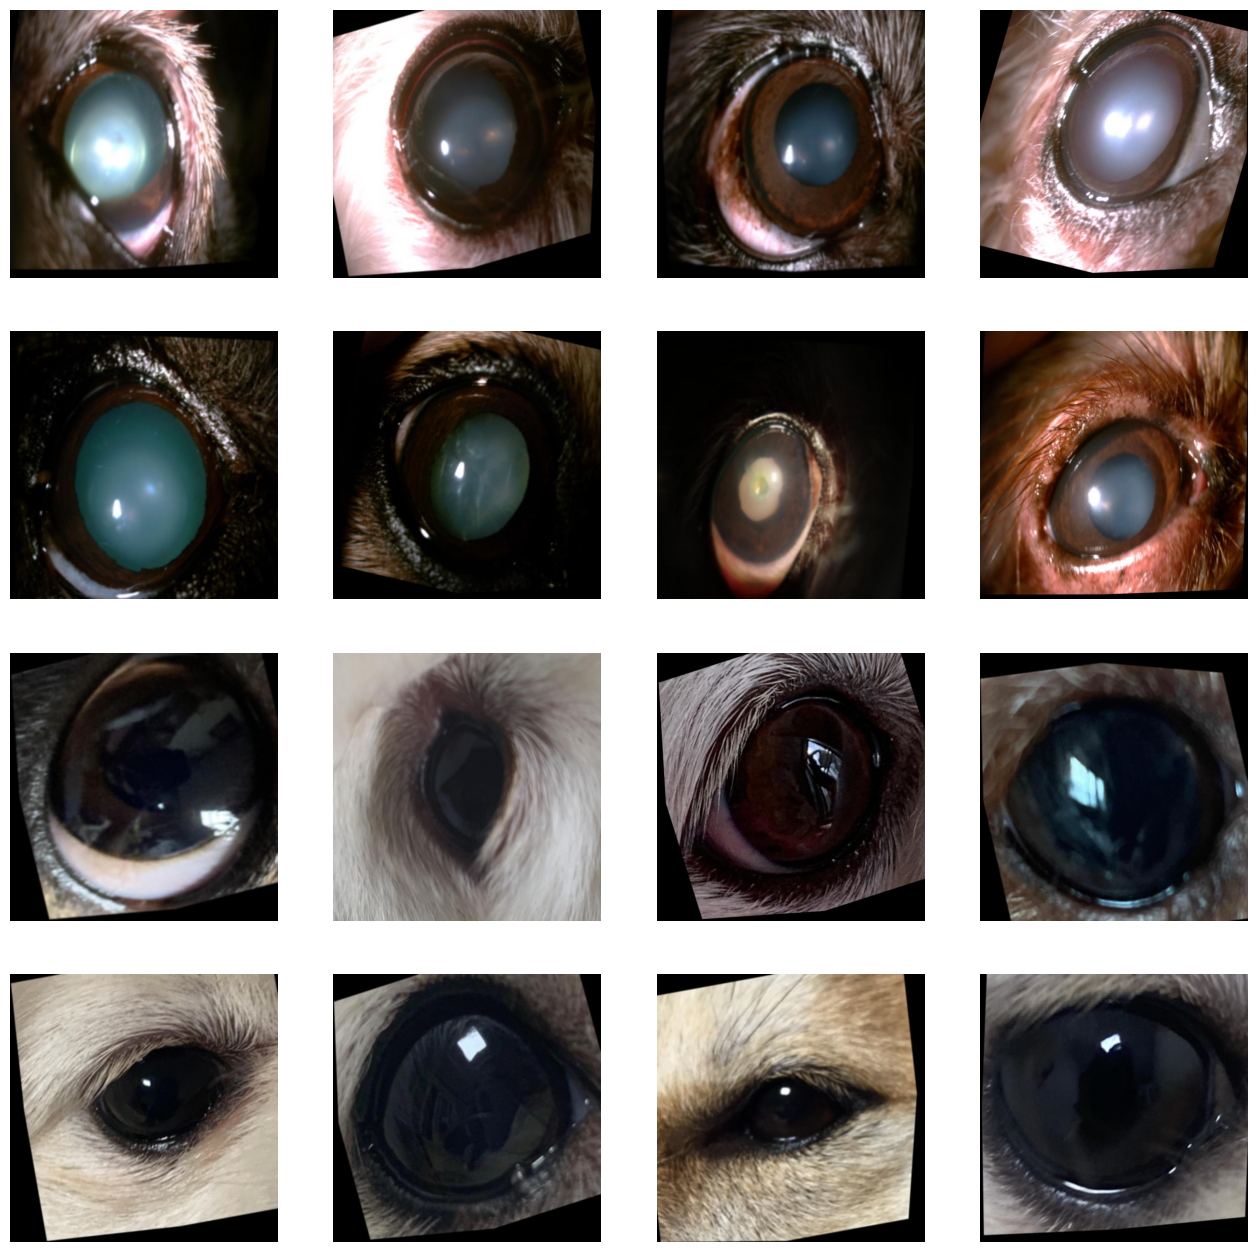

In [9]:

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_nuklear_pix = [os.path.join(train_nuklear_dir, fname) 
                for fname in train_nuklear_fnames[ pic_index-8:pic_index] 
               ]

next_healty_pix = [os.path.join(train_healty_dir, fname) 
                for fname in train_healty_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_nuklear_pix+next_healty_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') 

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [20]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid')  
])

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 128)     3584      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 128)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        73792     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 64)      

In [23]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001), 
              loss='binary_crossentropy',
              metrics = ['accuracy'])
#(learning_rate=0.0001),

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator(
                                   rescale=1./255,
                                   rotation_range=30,
                                   width_shift_range=0.3,
                                   height_shift_range=0.3,
                                   zoom_range=0.3,
                                   horizontal_flip=True)
test_datagen  = ImageDataGenerator( rescale = 1.0/255.,
                                   rotation_range=30,
                                   width_shift_range=0.3,
                                   height_shift_range=0.3,
                                   zoom_range=0.3,
                                   horizontal_flip=True)

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=25,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=25,
                                                         class_mode  = 'categorical',
                                                         target_size = (150, 150))

test_generator =  test_datagen.flow_from_directory(test_dir,
                                                         batch_size=25,
                                                         class_mode  = 'categorical',
                                                         target_size = (150, 150))


Found 2688 images belonging to 2 classes.
Found 336 images belonging to 2 classes.
Found 336 images belonging to 2 classes.


In [25]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(
            train_generator,
            epochs=40,
            steps_per_epoch=20,
            validation_data=validation_generator,
            validation_steps=10,            
            callbacks=[callback],
            verbose=1
            )
test_data = model.evaluate(test_generator)

Epoch 1/40
20/20 [==============================] - 85s 4s/step - loss: 0.6679 - accuracy: 0.6000 - val_loss: 0.6079 - val_accuracy: 0.7640
Epoch 2/40
20/20 [==============================] - 91s 5s/step - loss: 0.5448 - accuracy: 0.7520 - val_loss: 0.5876 - val_accuracy: 0.6840
Epoch 3/40
20/20 [==============================] - 82s 4s/step - loss: 0.5042 - accuracy: 0.7660 - val_loss: 0.4787 - val_accuracy: 0.7880
Epoch 4/40
20/20 [==============================] - 80s 4s/step - loss: 0.4387 - accuracy: 0.7980 - val_loss: 0.4827 - val_accuracy: 0.7800
Epoch 5/40
20/20 [==============================] - 88s 4s/step - loss: 0.4032 - accuracy: 0.8176 - val_loss: 0.3670 - val_accuracy: 0.8520
Epoch 6/40
20/20 [==============================] - 81s 4s/step - loss: 0.3439 - accuracy: 0.8500 - val_loss: 0.2658 - val_accuracy: 0.9240
Epoch 7/40
20/20 [==============================] - 88s 4s/step - loss: 0.2886 - accuracy: 0.8780 - val_loss: 0.2466 - val_accuracy: 0.9120
Epoch 8/40
20/20 [==

In [26]:
#print(test_data)
print('Test loss:', test_data[0]) 
print('Test accuracy:', test_data[1])

Test loss: 0.16367077827453613
Test accuracy: 0.9464285969734192


In [35]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = load_img(path, target_size=(150, 150))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving D3_0e71c437-60a5-11ec-8402-0a7404972c70_jpg.rf.463ef732fe4a32b1f5db47ea67814a76.jpg to D3_0e71c437-60a5-11ec-8402-0a7404972c70_jpg.rf.463ef732fe4a32b1f5db47ea67814a76.jpg
Saving D3_0e71c437-60a5-11ec-8402-0a7404972c70_jpg.rf.f3e36fc82896df7299f7da91870913d6.jpg to D3_0e71c437-60a5-11ec-8402-0a7404972c70_jpg.rf.f3e36fc82896df7299f7da91870913d6.jpg
1/1 [==============================] - 0s 51ms/step
D3_0e71c437-60a5-11ec-8402-0a7404972c70_jpg.rf.463ef732fe4a32b1f5db47ea67814a76.jpg
[[0. 1.]]
1/1 [==============================] - 0s 49ms/step
D3_0e71c437-60a5-11ec-8402-0a7404972c70_jpg.rf.f3e36fc82896df7299f7da91870913d6.jpg
[[0. 1.]]


1/1 [==============================] - 0s 192ms/step


<ipython-input-27-def6c19c42e2>:49: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std ()


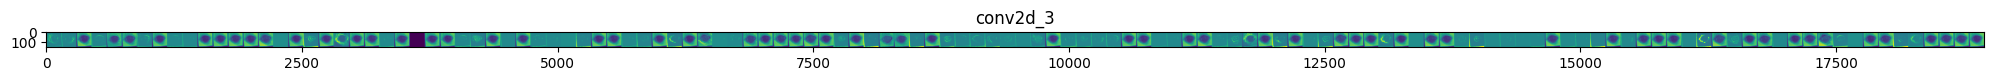

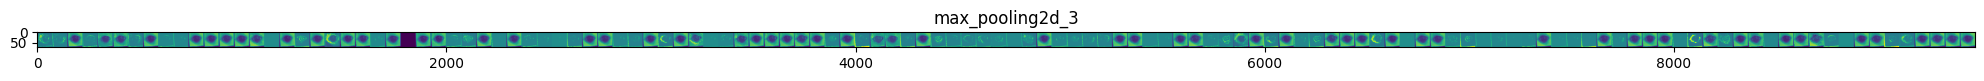

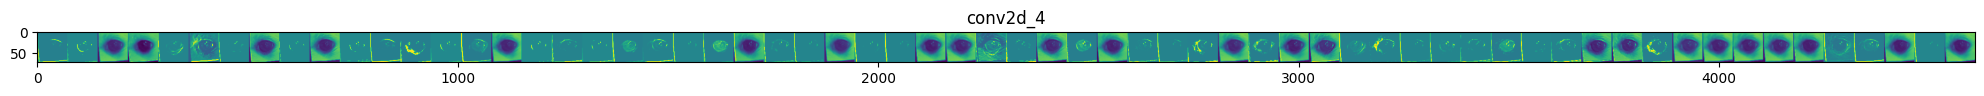

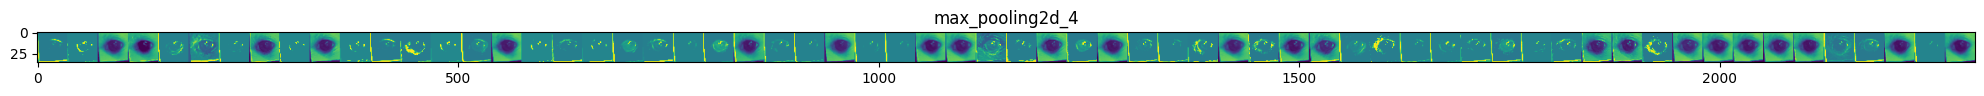

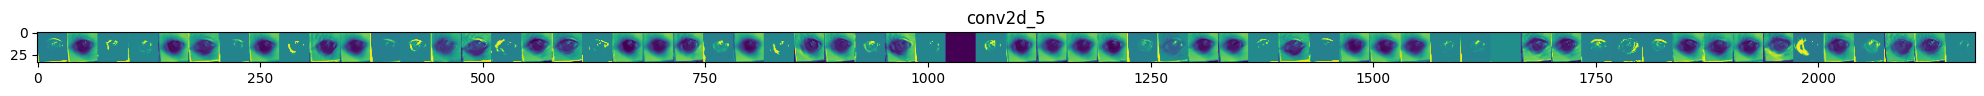

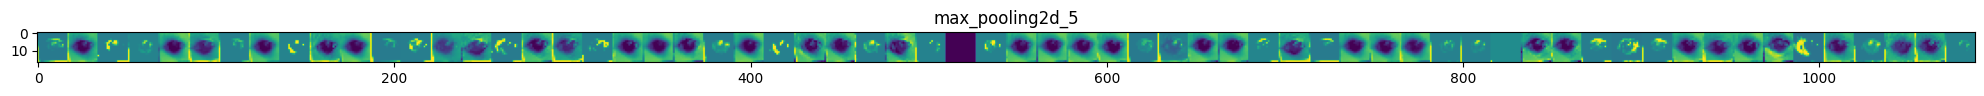

In [27]:
import numpy as np
import random
from tensorflow.keras.utils import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model
successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
nuklear_img_files = [os.path.join(train_nuklear_dir, f) for f in train_nuklear_fnames]
healthy_img_files = [os.path.join(train_healty_dir, f) for f in train_healty_fnames]

img_path = random.choice(nuklear_img_files + healthy_img_files )
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Scale by 1/255
x /= 255.0

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------
    scale = 25. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

Text(0.5, 1.0, 'Training and validation loss')

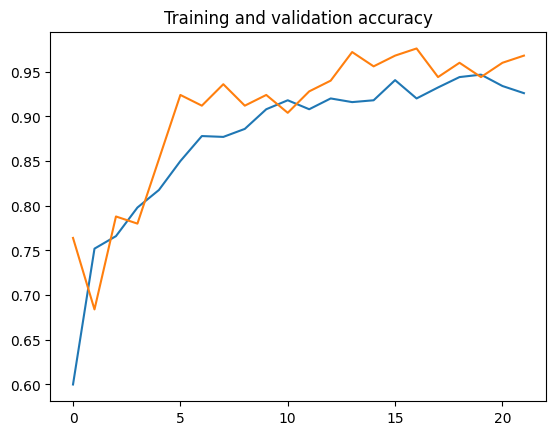

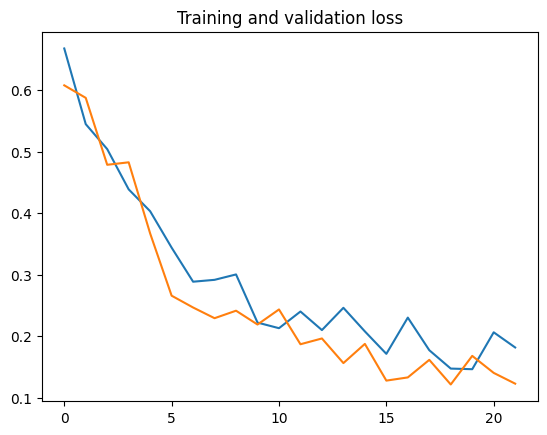

In [28]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

In [30]:
model.save('/content/model.h5')

In [29]:
model.save('/content/saved_model_file')

In [32]:
!zip -r /content/saved_model_file.zip /content/saved_model_file

  adding: content/saved_model_file/ (stored 0%)
  adding: content/saved_model_file/fingerprint.pb (stored 0%)
  adding: content/saved_model_file/keras_metadata.pb (deflated 92%)
  adding: content/saved_model_file/saved_model.pb (deflated 89%)
  adding: content/saved_model_file/variables/ (stored 0%)
  adding: content/saved_model_file/variables/variables.index (deflated 64%)
  adding: content/saved_model_file/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: content/saved_model_file/assets/ (stored 0%)


In [36]:
from google.colab import files
files.download('saved_model_file.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>